# Exploration and analysis of the house prices database

### Imports and function definitions

Check if notebook is running locally or on kaggle/colab

In [1]:
import os
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

print("os.environ.get('KAGGLE_URL_BASE') == ", os.environ.get('KAGGLE_URL_BASE'))
if 'kaggle' in os.environ.get('KAGGLE_URL_BASE','localhost'):
    print("We are running on a Kaggle Server")
    IN_KAGGLE = True
else:
    IN_KAGGLE = False

os.environ.get('KAGGLE_URL_BASE') ==  None


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [3]:
def plot_categorical(grouped,label,figsize=(12,8)):
    plt.figure(figsize=figsize)
    labels=[]
    data=[]
    for name,group in grouped:
        labels.append(name)
        data.append(group[label])
    plt.boxplot(data,labels=labels)
    plt.xlabel(name)
    plt.ylabel(label)
    plt.show()

In [4]:
try:
    from scripts_sklearn.utils import feat_eng
except:
    def feat_eng(df):
        ''' performs dataframe cleaning and basic feature engineering'''
        #total floors
        df['TotFlrSF']=df['1stFlrSF']+df['2ndFlrSF']
        #total number of floors (1 or 2)
        df['nFlrs']=df['2ndFlrSF'].map(lambda x: int(x>0)+1.)#if df['2ndFlrSF']>0 then df['nFlrs']=2
        df['GarageType']=df['GarageType'].fillna('NoGarage')
        df['GarageQual']=df['GarageQual'].fillna('NoGarage')
        df['GarageCond']=df['GarageCond'].fillna('NoGarage')
        df['PoolQC']=df['PoolQC'].fillna('NoPool')
        df['FireplaceQu']=df['FireplaceQu'].fillna('NoFp')
        #garage cars vs house size
        #number of bathrooms vs house size/n bedrooms
        return df

In [5]:
if(IN_KAGGLE):
    train_path='../input/house-prices-advanced-regression-techniques/train.csv'
    test_path='../input/house-prices-advanced-regression-techniques/test.csv'
else:
    train_path='data/train.csv'
    test_path='data/test.csv'

In [6]:
train=pd.read_csv(train_path)
test=pd.read_csv(test_path)

In [7]:
train,test=feat_eng(train),feat_eng(test)

In [8]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotFlrSF,nFlrs
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,1710,2.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,1262,1.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,1786,2.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,1717,2.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,2198,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Normal,175000,1647,2.0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,2,2010,WD,Normal,210000,2073,1.0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,GdPrv,Shed,2500,5,2010,WD,Normal,266500,2340,2.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2010,WD,Normal,142125,1078,1.0


C:\Users\Alessandro\AppData\Local\Temp\ipykernel_16336\2270154996.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr()


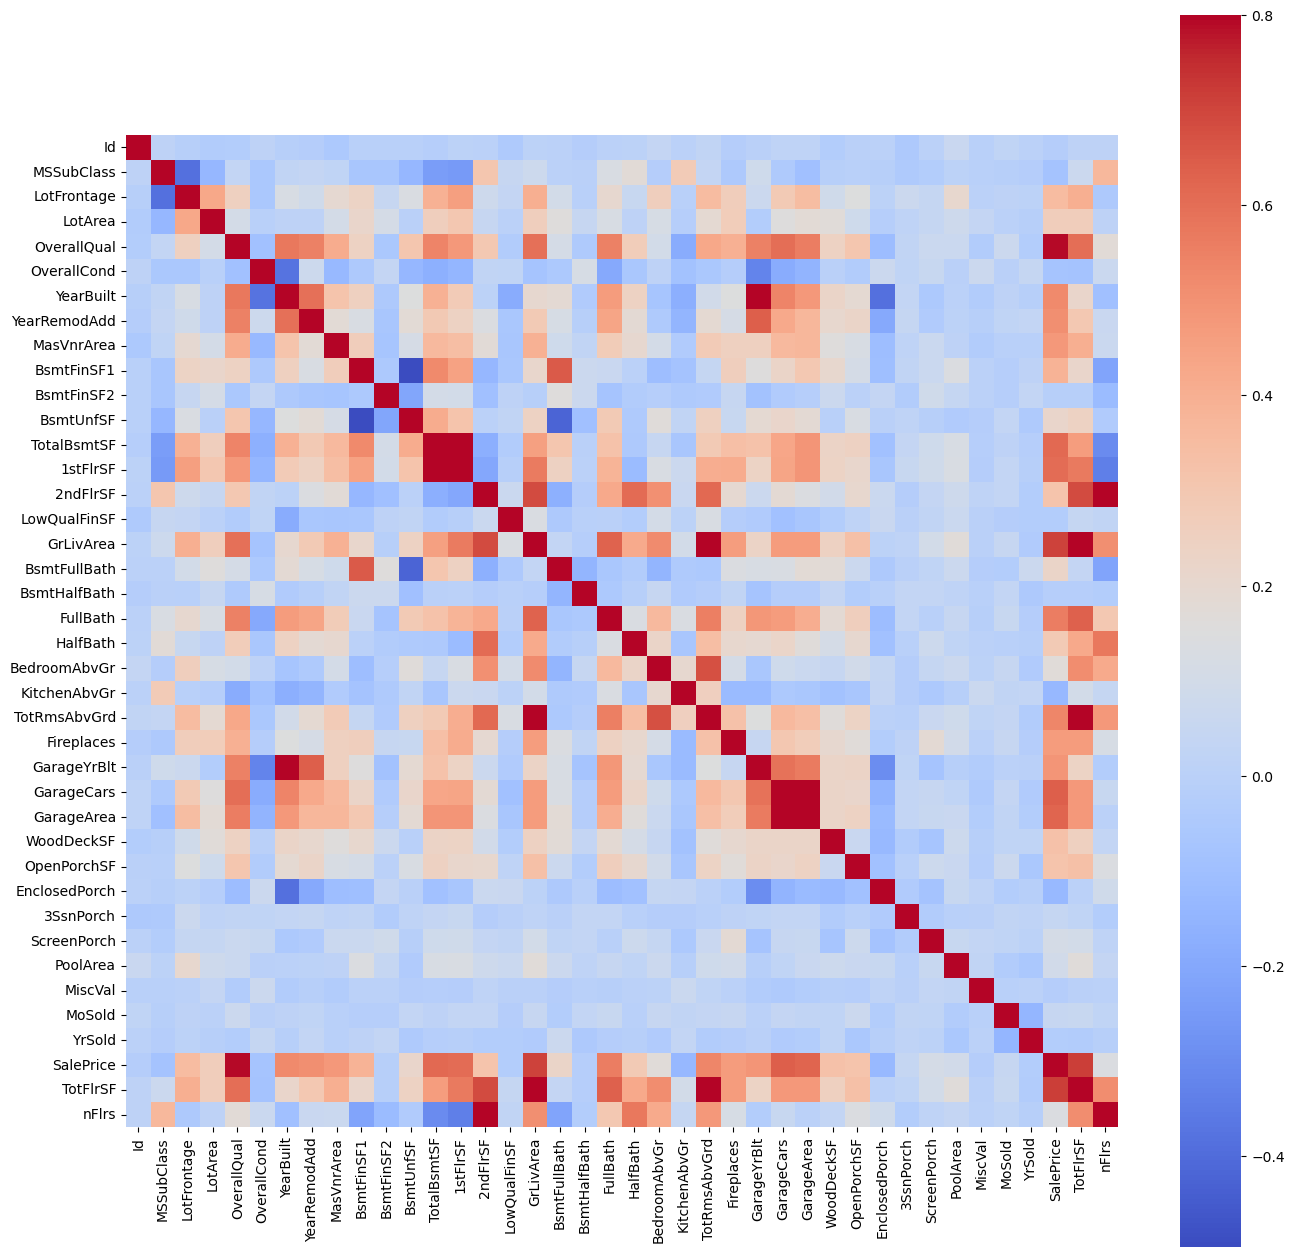

In [9]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="coolwarm")
plt.show()

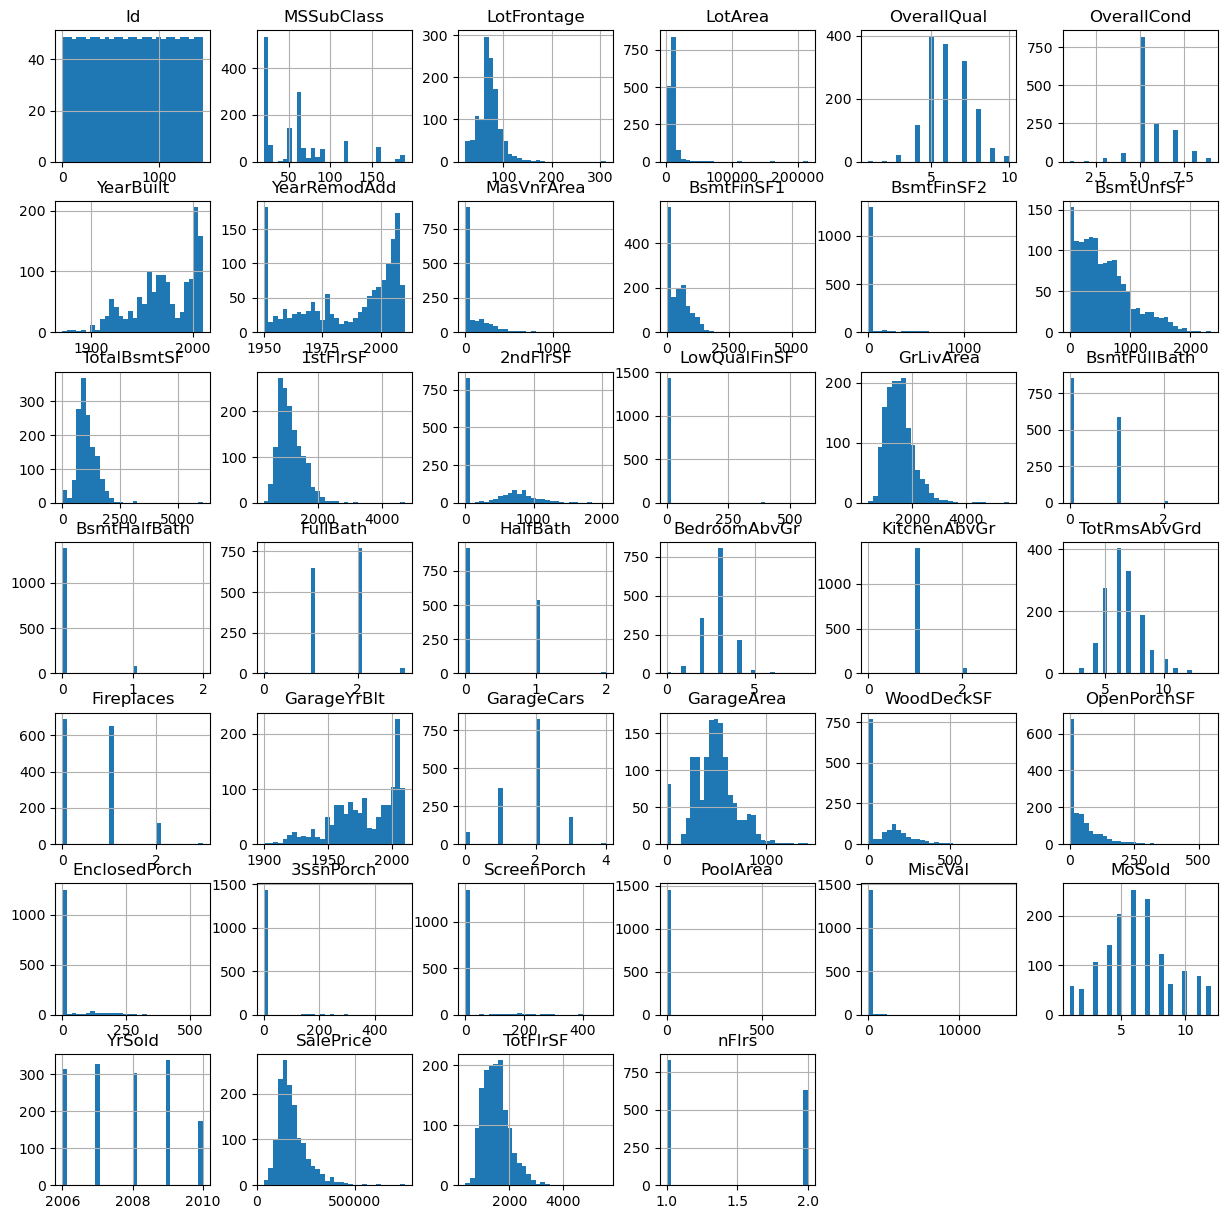

In [10]:
train.hist(bins=30, figsize=(15,15))
plt.show()

In [11]:
features=test.keys()
label='SalePrice'

In [ ]:
def plot_features_vs_label(train,label):
    i=0
    for f in features:
        grouped=train.groupby(f)
        if len(grouped.groups)>=20:
            print(f,i)
            i+=1
            fig=plt.figure(figsize=(12,8))
            plt.scatter(train[f],train[label])
            plt.xlabel(f)
            plt.ylabel(label)
            plt.show()
        else:
            print(f,i)
            i+=1
            plot_categorical(grouped,label=label)
    '''    else:
            fig=plt.figure(12,8)
            plt.scatter(train[f],train[label])'''

In [13]:
plot=False
if plot:
    plot_features_vs_label(train,label)


In [14]:
train.sort_values(by='GrLivArea',ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotFlrSF,nFlrs
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,NaN,NaN,0,1,2008,New,Partial,160000,5642,2.0
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,NaN,NaN,0,10,2007,New,Partial,184750,4676,2.0


In [15]:
fig = px.scatter(train, x="GrLivArea", y=label, hover_data=['Id'],color='Neighborhood',height=800)
fig.show()

In [16]:
fig = px.scatter(train.drop([523,1298]), x="GrLivArea", y=label, hover_data=['Id'],color='Neighborhood',height=800)
fig.show()

Null values

In [17]:
count=train.isna().sum()
count=pd.DataFrame(count)
count[count[0]!=0]

,0
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [18]:
int_cat_f=['SaleCondition','TotRmsAbvGrd','ExterQual','Exterior1st','Neighborhood',
            'GarageFinish','KitchenQual','SaleType','PoolQC', 'OverallCond',
            'FullBath','HouseStyle','Condition1','MSZoning','BldgType','BsmtQual']
int_num_f=['LotArea','LotFrontage','BsmtFinSF1','TotalBsmtSF',
            'GrLivArea','GarageYrBlt','GarageArea','YearBuilt','MSSubClass','GarageCars','OverallQual']
int_ord_f=[]

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler ,KBinsDiscretizer, OrdinalEncoder
from sklearn.dummy import DummyRegressor

In [22]:

def pipeline_builder(n_cols,c_cols,o_cols,b_cols):
    numeric_transformer = Pipeline(steps=[
        ('inp',SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])
    categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    binned_transformer = Pipeline(steps=[('inp',SimpleImputer(strategy='median')),
                                    ('KBinsDiscretizer',KBinsDiscretizer(n_bins=10))])
    ordinal_transformer = Pipeline(steps=[('onehot', OrdinalEncoder())])
    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, n_cols),
        ('cat', categorical_transformer, c_cols),
        ('ord', ordinal_transformer, o_cols),
        ('bin',binned_transformer, b_cols)
        ])
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', DummyRegressor())])
    pipeline
    return pipeline, preprocessor

In [21]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotFlrSF,nFlrs
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,1710,2.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,1262,1.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,1786,2.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,1717,2.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,2198,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Normal,175000,1647,2.0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,2,2010,WD,Normal,210000,2073,1.0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,GdPrv,Shed,2500,5,2010,WD,Normal,266500,2340,2.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2010,WD,Normal,142125,1078,1.0


In [29]:
pipe,prep=pipeline_builder(int_num_f,[],[],[])


In [51]:
result=prep.fit_transform(train.drop([523,1298]))

In [52]:
from minisom import MiniSom

In [78]:
som_shape=(15,15)

som = MiniSom(som_shape[0], som_shape[1], result.shape[1], sigma=1.5, learning_rate=.7, activation_distance='euclidean',
              topology='rectangular', neighborhood_function='gaussian', random_seed=10)

som.train_batch(result, 500, verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 1.290217767218165


In [79]:
xx, yy = som.get_euclidean_coordinates()
umatrix = som.distance_map()
weights = som.get_weights()


In [80]:
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D

In [81]:
import plotly.graph_objects as go

win_map = som.win_map(result)
size=som.distance_map().shape[0]
qualities=np.empty((size,size))
qualities[:]=np.NaN
for position, values in win_map.items():
    qualities[position[0], position[1]] = np.mean(abs(values-som.get_weights()[position[0], position[1]]))

layout = go.Layout(title='quality plot')
fig = go.Figure(layout=layout)
fig.add_trace(go.Heatmap(z=qualities, colorscale='Viridis'))
fig.show()

In [87]:
len(int_num_f)

11

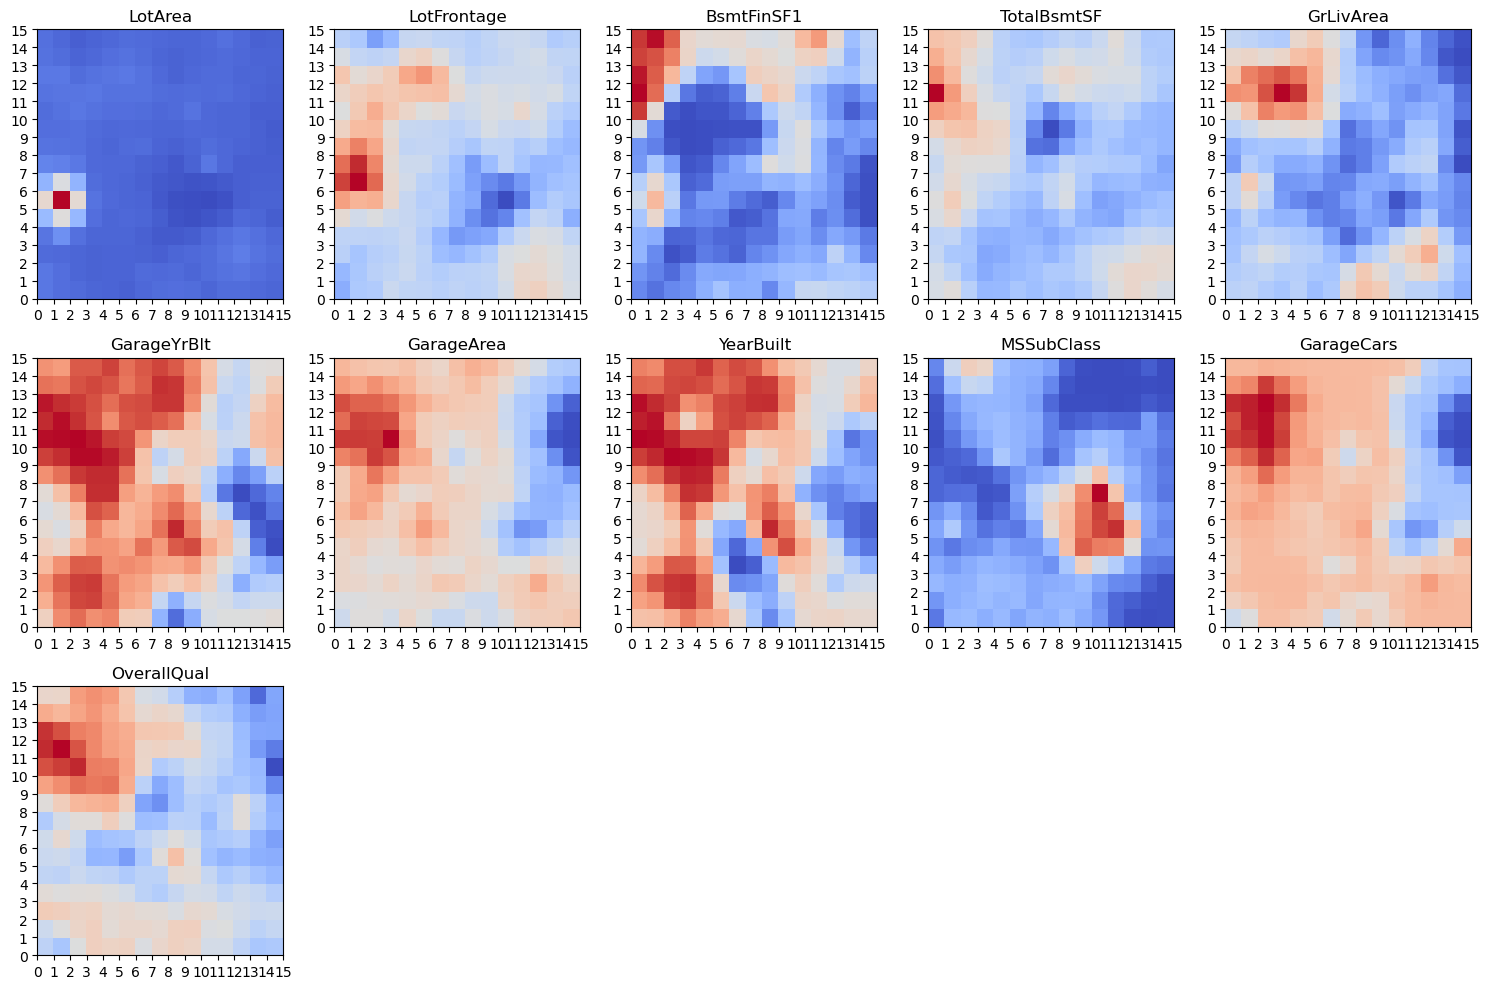

In [88]:
W = som.get_weights()
plt.figure(figsize=(15, 10))
for i, f in enumerate(int_num_f):
    plt.subplot(3,5, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
plt.tight_layout()
plt.show()

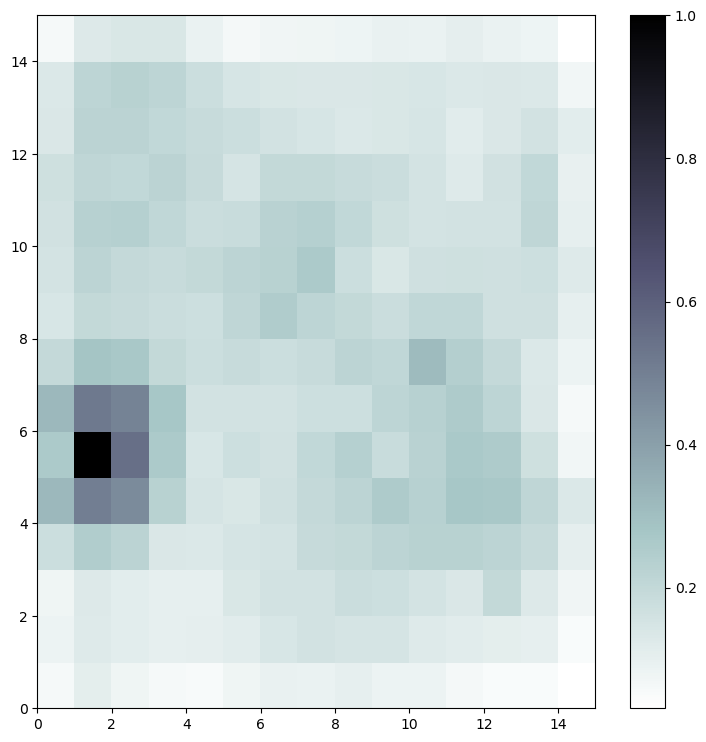

In [89]:
plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(result):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx


plt.show()